# Data loader 

Made with windsurf cascade

In [3]:
def load_coordinates(filename):
    coordinates = []
    with open(filename, 'r') as f:
        for line in f:
            if line.strip():  # Skip empty lines
                x, y = map(int, line.strip().split(','))
                coordinates.append((x, y))
    return coordinates



In [29]:
coordinates = load_coordinates('18.txt')
# print(len(coordinates), coordinates) #len(coordinates)

grid = [[0] * 71 for _ in range(71)]

for  index, (x, y) in enumerate(coordinates):
    if index < 1024:
        grid[y][x] = 1

# grid

3450 [(3, 10), (40, 53), (23, 1), (3, 14), (42, 69), (43, 64), (11, 2), (12, 7), (45, 49), (7, 3), (2, 17), (1, 29), (57, 52), (11, 3), (7, 27), (62, 51), (9, 29), (10, 19), (63, 69), (32, 65), (21, 62), (53, 46), (55, 65), (3, 26), (35, 61), (51, 63), (10, 3), (31, 55), (23, 4), (28, 49), (41, 67), (69, 49), (62, 41), (30, 67), (59, 39), (18, 5), (54, 55), (69, 64), (9, 14), (30, 43), (63, 43), (67, 44), (23, 56), (23, 10), (11, 27), (7, 18), (0, 27), (19, 6), (22, 61), (33, 59), (59, 49), (67, 51), (59, 57), (59, 69), (5, 27), (27, 24), (44, 57), (13, 47), (1, 5), (42, 65), (55, 61), (18, 37), (67, 36), (67, 43), (43, 46), (42, 63), (23, 12), (13, 45), (52, 49), (1, 34), (63, 37), (19, 39), (31, 0), (26, 59), (29, 65), (15, 29), (62, 31), (9, 20), (4, 31), (23, 45), (36, 1), (19, 59), (29, 9), (69, 67), (67, 52), (25, 42), (23, 60), (12, 11), (5, 11), (20, 17), (32, 69), (33, 15), (27, 4), (0, 1), (55, 62), (15, 9), (31, 45), (13, 8), (29, 52), (53, 53), (13, 19), (23, 65), (57, 39),

# Visualizer

made with windsurf infill

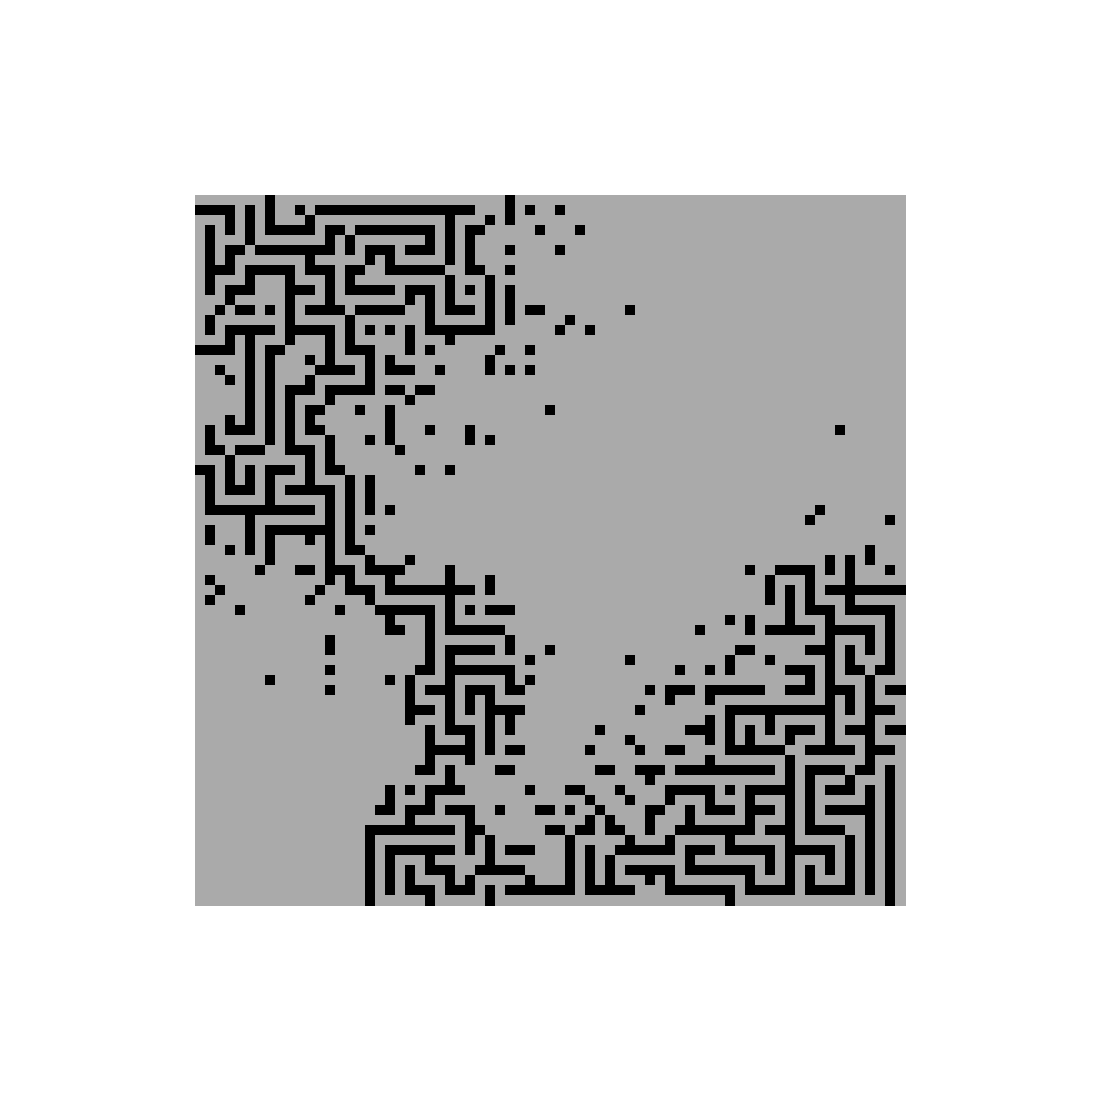

In [30]:
from PIL import Image, ImageDraw, ImageFont

def visualize_grid(grid, padding=20, point_size=5):
    # Find the dimensions of the grid
    min_x = 0
    max_x = len(grid[0])
   
    min_y = 0
    max_y = len(grid)
    
    
    # Calculate image dimensions with padding
    width = max_x - min_x + 1 + (2 * padding)
    height = max_y - min_y + 1 + (2 * padding)
    
    # Create a white image
    image = Image.new('RGB', (width * 10, height * 10), 'white')
    draw = ImageDraw.Draw(image)
    
    # Draw grid points
    for y in range(max_y):
        for x in range(max_x):
            # Adjust coordinates with padding and scaling
            pixel_x = (x - min_x + padding) * 10
            pixel_y = (y - min_y + padding) * 10
            if(grid[y][x] == 1):
                # Draw a filled circle for each point
                draw.rectangle((pixel_x - point_size, pixel_y - point_size, pixel_x + point_size, pixel_y + point_size), fill='black')
            else:
                draw.rectangle((pixel_x - point_size, pixel_y - point_size, pixel_x + point_size, pixel_y + point_size), fill='#AAAAAA')

   
    # Display the image
    # image.show()
    
    # Save the image as a PNG file
    display(image)
visualize_grid(grid)

# Part 1

Djikstra created with windsurf cascade

In [31]:
from collections import deque
import heapq

def find_shortest_path(grid):
    if not grid or not grid[0]:
        return -1
    
    rows, cols = len(grid), len(grid[0])
    
    # Check if start or end is blocked
    if grid[0][0] == 1 or grid[rows-1][cols-1] == 1:
        return -1
    
    # Priority queue for Dijkstra's algorithm
    # Format: (distance, row, col)
    pq = [(0, 0, 0)]
    
    # Keep track of visited cells and their distances
    distances = {(0, 0): 0}
    
    # Possible movements: up, right, down, left
    directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    
    while pq:
        dist, row, col = heapq.heappop(pq)
        
        # If we reached the target
        if row == rows-1 and col == cols-1:
            return dist
        
        # If we found a longer path to this cell
        if (row, col) in distances and dist > distances[(row, col)]:
            continue
        
        # Check all possible movements
        for dx, dy in directions:
            new_row, new_col = row + dx, col + dy
            
            # Check if the new position is valid
            if (0 <= new_row < rows and 
                0 <= new_col < cols and 
                grid[new_row][new_col] != 1):
                
                new_dist = dist + 1
                
                # If we found a shorter path or haven't visited this cell
                if ((new_row, new_col) not in distances or 
                    new_dist < distances[(new_row, new_col)]):
                    
                    distances[(new_row, new_col)] = new_dist
                    heapq.heappush(pq, (new_dist, new_row, new_col))
    
    # If we can't reach the target
    return -1

# Example usage:

result = find_shortest_path(grid)
print(f"Shortest path length: {result}")

Shortest path length: 264


# Part 2

Solved by hand with autocomplete (brute force seemed to work!)

In [32]:
grid = [[0] * 71 for _ in range(71)]
for cell in coordinates:
    grid[cell[1]][cell[0]] = 1
    result = find_shortest_path(grid)
    if result == -1:
        print(cell, result)
        break


(41, 26) -1
